# Tutorial: Information Imbalance

To see all functions which you can call within this class, please refer to: https://dadapy.readthedocs.io/en/latest/metric_comparisons.html

In [113]:
import matplotlib.pyplot as plt
import numpy as np

from dadapy.plot import plot_inf_imb_plane
from dadapy.metric_comparisons import MetricComparisons

%matplotlib inline

In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3D Gaussian with small variance along $z$

In this section we define a simple dataset sampled from a 3D Gaussian distribution with a small variance along the $z$ axis.

### Included methods:
- Prediction of the full feature space vs. specified subsets of features: return_inf_imb_full_selected_coords

In [115]:
# sample dataset

N = 1000

cov = np.identity(3)
cov[-1, -1] = 0.01**2 # variance along z is much smaller!
mean = np.zeros(3)
X = np.random.multivariate_normal(mean = mean, cov = cov, size = (N))



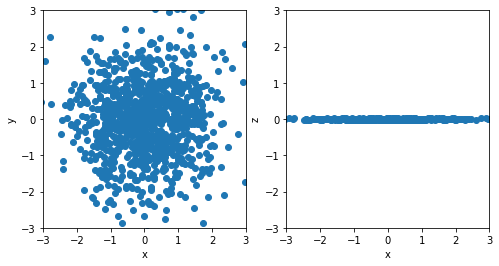

In [119]:
# plot the sampled points

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

ax1.scatter(X[:, 0], X[:, 1])
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.scatter(X[:, 0], X[:, 2])
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
plt.show()

In [120]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X)


In [122]:
# list of the coordinate names
labels = ['x', 'y', 'z']

# list of the the subsets of coordinates for which the imbalance should be computed
coord_list = [[0,], [1,], [2,], [0,1], [0,2], [1, 2]]


In [123]:
# compute the information imbalances from the full 3D space to the spaces in coord_list and vice versa

imbalances = d.return_inf_imb_full_selected_coords(coord_list)


total number of computations is:  6
total number of computations is:  6


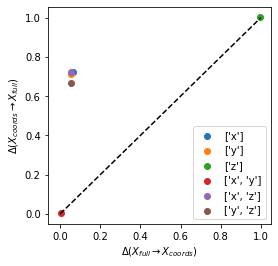

In [124]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances, coord_list, labels)

From the graph above we see that the small variance along the $z$ makes the $[x, y]$ space equivalent to the $[x, y, z]$ space (red circle) and the $z$ space (green circle) is seen to be much less informative than the $x$ and $y$ spaces (blue and orange circles).

## 4D isotropic Gaussian

In this example we explore the possibility of having a symmetrical yet partial sharing of information between two spaces. We will take the case of a dataset sampled from a 4D isotropic Gaussian.

### Included methods:
- Prediction of two feature subsets vs. each other: return_inf_imb_two_selected_coords

In [125]:
# sample the dataset
N = 2000

X = np.random.normal(size = (N, 4))


In [126]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X, maxk=X.shape[0]-1)

In [127]:

# compute the imbalance between the [x, y] space and the [y, z] space
imb_1common = d.return_inf_imb_two_selected_coords(coords1= [0, 1], coords2= [1, 2])

# compute the imbalance between the [x, y, z] space and the [y, z, w] space
imb_2common = d.return_inf_imb_two_selected_coords(coords1= [0, 1, 2], coords2= [1, 2, 3])

print(imb_1common)
print(imb_2common)


(0.5807245000000001, 0.5771635)
(0.338305, 0.3444355)


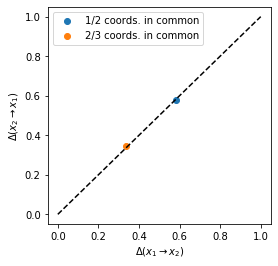

In [128]:
# plot information imbalance plane
plt.figure(figsize=(4, 4))

plt.scatter(imb_1common[0], imb_1common[1], label = '1/2 coords. in common')
plt.scatter(imb_2common[0], imb_2common[1], label = '2/3 coords. in common')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel(r'$\Delta(x_1 \rightarrow x_2) $')
plt.ylabel(r'$\Delta(x_2 \rightarrow x_1) $')

plt.legend()
plt.show()

We see that the information imbalances between the spaces $[x, y, z]$ and $[y, z, w]$ (orange circle) are lower than the imbalances between $[x, y]$ and $[y, z]$ (blue circle). 
However in both cases, since the information shared between the spaces is symmetric, the correponding point lies alog the diagonal of the information imbalance plane. 

## 10D isotropic Gaussian dataset

In this example we analayse the information imbalance for a 10D Gaussian and isotropic dataset.

### Included methods:
- Prediction of the full feature space vs. a specified subsets of features: return_inf_imb_full_selected_coords
- Prediction of the full feature space vs. all single features and vice versa: return_inf_imb_full_all_coords
- Optimized combinatorial search of a subset of features up to a certain tuple size vs. the full feature space: greedy_feature_selection_full

In [129]:
# sample data 

N = 1000
X = np.random.normal(size = (N, 10))


In [130]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X, maxk = X.shape[0]-1)


In [131]:
# define labels of coordinates and the coordinate sets we want to analyse

labels = ['x{}'.format(i) for i in range(10)]

coord_list = [np.arange(i) for i in range(1, 11)]

In [132]:
# compute the information imbalances

imbalances = d.return_inf_imb_full_selected_coords(coord_list)

total number of computations is:  10
total number of computations is:  10


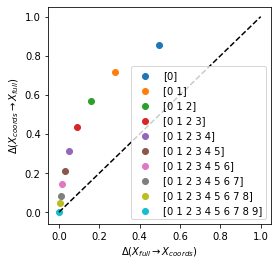

In [133]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances, coord_list)

We see that all subsets of coordinates are contained in the full space and that adding coordinates progressively brings the information imbalance to zero.

If one wants to know how all of your single varibales perform predicting the full space, you can use the following method:

In [134]:
# compute the information imbalances from the full space to all single variables and vice versa:

imbalances = d.return_inf_imb_full_all_coords()

total number of computations is:  10
total number of computations is:  10


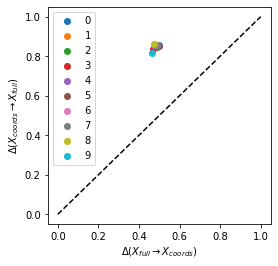

In [135]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances, range(10))

We see that all single coordinates are contained in the full space (information imbalance $ca.$ 0.5), yet that all the single spaces have low predictive power of the full space (information imbalance > 0.8).

In cases with big feauture spaces it might be difficult to find optimal imbalances in growing subsets of features due to long calculations. The greedy optimization speeds this process up:

In [137]:
# find optimal sets of variables up to 7-plets (n_coords=7). 
# n_best is a parameter that makes the greedy optimization better yet slower when higher.

best_sets, best_imbs, all_imbs = d.greedy_feature_selection_full(n_coords=7, n_best=5, k=1)

taking full space as the target representation
total number of computations is:  10
total number of computations is:  35
total number of computations is:  33
total number of computations is:  29
total number of computations is:  24
total number of computations is:  18
total number of computations is:  15


In [138]:
# these are the optimum sets of each n-plet size:

print(best_sets)

[[9], [9, 3], [9, 2, 4], [9, 3, 4, 6], [1, 3, 4, 5, 9], [1, 2, 3, 4, 6, 9], [1, 2, 3, 4, 5, 8, 9]]


In [139]:
# for each optimum variable set of increasing size, these are the information imbalances 
# [full-->reduced, reduced --> full]

print(best_imbs)

[[0.46 0.82]
 [0.25 0.65]
 [0.14 0.49]
 [0.08 0.38]
 [0.05 0.26]
 [0.03 0.19]
 [0.01 0.12]]


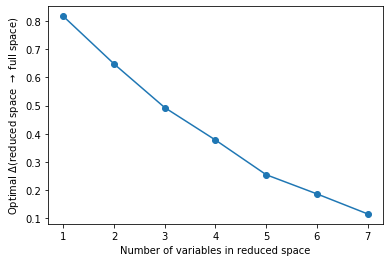

In [140]:
plt.plot(range(1,8), best_imbs[:,1], "o-")
plt.ylabel(r'Optimal $\Delta$(reduced space $\rightarrow$ full space)')
plt.xlabel("Number of variables in reduced space")
plt.show()

We see that with increasing tuple size the optimal information imbalances (best_imbs) improve. The according best coordinates are found easily (best_sets). All imbalances of trial tuples of each size are stored in the third output (all_imbs).

In [149]:
# for example, the imbalances of all 4-plets predicting the the full space (reduced --> full) are:

all_imbs[3][1]

[0.378,
 0.378,
 0.396,
 0.401,
 0.414,
 0.411,
 0.402,
 0.405,
 0.421,
 0.395,
 0.403,
 0.411,
 0.399,
 0.378,
 0.423,
 0.411,
 0.38,
 0.387,
 0.391,
 0.397,
 0.38,
 0.4,
 0.401,
 0.44,
 0.41,
 0.413,
 0.389,
 0.388,
 0.397]

## Sinusoidal function

In this section we will show that the information imbalance is capable of correctly detecting information asymmetries also in the presence of arbitrary nonlinearities.


### Included methods: 
- Prediction of two feature subsets vs. each other: return_inf_imb_two_selected_coords
- Pairwise prediction of all single features vs. each other: return_inf_imb_matrix_of_coords
- Prediction of ranks calculated in a target space vs. all single features in a separate feature space and v.v.: return_inf_imb_target_all_coords
- Prediction of ranks calculated in a target space vs. a defined subsets of features of a seperate feature space and v.v.: return_inf_imb_target_selected_coords
- Search of a subset of features of certain size vs. a (separate) target space: return_inf_imb_target_all_dplets
- Optimized combinatorial search of a subset of features of certain size vs. a (separate) target space: greedy_feature_selection_target

### Sinusoidal function - 2D

In [150]:
# sample a noisy sinusoidal dataset

N = 1000

x1 = np.linspace(0,1, N)
x1 = np.random.uniform(0, 1, N)
x1 = np.sort(x1)
x1 = np.atleast_2d(x1).T

x2 = 5*np.sin(x1*25)+np.random.normal(0, .5, (N, 1))

X = np.hstack([x1, x2])

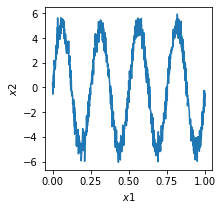

In [159]:
# plot the data, note that the variance is much higher along x2 than along x1
plt.figure(figsize = (3, 3))
plt.plot(x1, x2);
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')
plt.show()

In [152]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X, maxk = X.shape[0]-1)


In [153]:
imb01, imb10 = d.return_inf_imb_two_selected_coords([0], [1])

In [154]:
print(imb01, imb10)

0.202654 1.034432


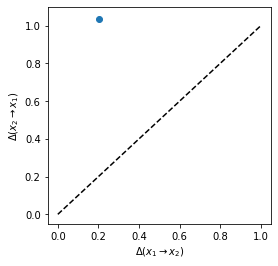

In [155]:
# plot information imbalance plane
plt.figure(figsize=(4, 4))

#plot_inf_imb_plane(imbalances, coord_list, labels)
plt.scatter(imb01, imb10)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel(r'$\Delta(x_1 \rightarrow x_2) $')
plt.ylabel(r'$\Delta(x_2 \rightarrow x_1) $')
plt.show()

The information imbalance from $x_1$ to $x_2$ is much lower than that from $x_2$ to $x_1$. The $x_1$ space is detected as more informative, in spite of the much larger variance of the data along $x_2$.

### Sinusoidal function - 3D



Let's add another as another variable a shuffled version of $x_1$ and consider how the single variables predict each other:

In [38]:
# add x3 as shuffled x1 data
x3 = 1*x1
np.random.shuffle(x3)

XX = np.hstack([x1, x2, x3])

# define a new instance of the MetricComparisons class

d2 = MetricComparisons(XX, maxk = XX.shape[0]-1)

In [39]:
# compute the information imbalances from each of the single variables to each of the others and vice versa 

imb_matrix = d2.return_inf_imb_matrix_of_coords()
print(imb_matrix)

[[0.   0.2  0.94]
 [1.   0.   0.99]
 [0.95 0.99 0.  ]]


From above matrix of information imbalances we can see that the single variables predict themselves perfectly (diagonale) and that $x_1$ predicts $x_2$ well (imb_matrix[0,1]) with a low information imbalance. All other pairwise single variable information imbalances are around 1, which means they do not predict each other well.

### Sinusoidal function - 3D vs. 1D periodic target space

In certain cases the coordinate space does not include the same variables as the target space, or, similarly, the variables in both spaces need to be treated differently, e.g. because one of them includes periodic variables.

In [156]:
# create a periodic variable x4 as copy of x2, with a period of 12, running from -6 to +6.

x4=np.zeros(shape=x2.shape)

# for DADApy, periodic variables have to run from 0 to their period:
x4=x2%12

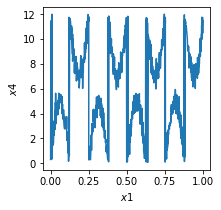

In [161]:
# plot the data, note that the variance is much higher along x4 than along x1
plt.figure(figsize = (3, 3))
plt.plot(x1, x4);
plt.xlabel(r'$x1$')
plt.ylabel(r'$x4$')
plt.show()

In [162]:
# distances calculated from x4 are periodic and serve as our target distances

a = MetricComparisons(x4)

a.compute_distances(maxk=x4.shape[0]-1, period=12) # set the period for periodic distance calculations

targets_x4 = a.dist_indices

In [163]:
# compute the information imbalances from each of the single variables in the d2 object (includes x1, x2, x3)
# to the target ranks computed with periodicity from x4: 

imb_target = d2.return_inf_imb_target_all_coords(target_ranks=targets_x4)

total number of computations is:  3


In [164]:
imb_target

array([[1.03, 0.44, 0.97],
       [0.21, 0.44, 1.  ]])

Text(0, 0.5, '$\\Delta$(test spaces $\\rightarrow$ periodic target)')

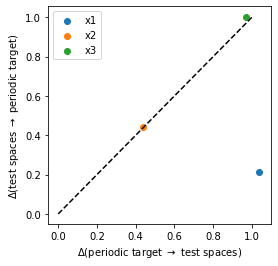

In [165]:
# plot information imbalance plane

plot_inf_imb_plane(imb_target, ["x1", "x2", "x3"])
plt.xlabel(r'$\Delta$(periodic target $\rightarrow$ test spaces)')
plt.ylabel(r'$\Delta$(test spaces $\rightarrow$ periodic target)')

The periodic target space $x_4$ describes $x_1$ poorly($\Delta$ close 1), but $x_1$ describes it well ($\Delta$ ~ 0.2, blue dot). The original sinosoidal $x_2$ and the target space $x_4$ have symmetric shared information (orange dot). The shuffled variable $x_3$ and the target space $x_4$ do not predict each other (green dot).

Instead of all single feature imbalances to the target space, we can use selected subsets of features (coords):

In [170]:
coords = [[0,], [1,], [2,], [0,1], [0,2], [1, 2]]
labels=['x1', 'x2', 'x3', 'x1 and x2', 'x1 and x3', 'x2 and x3']

In [171]:
# compute the information imbalances from each of the single variables in X 
# to the target ranks computed with periodicity from x4: 

imb_target_sel = d2.return_inf_imb_target_selected_coords(target_ranks=targets_x4, coord_list=coords)

total number of computations is:  6


In [172]:
imb_target_sel

array([[1.03, 0.44, 0.97, 0.44, 1.02, 0.44],
       [0.21, 0.44, 1.  , 0.32, 0.38, 0.45]])

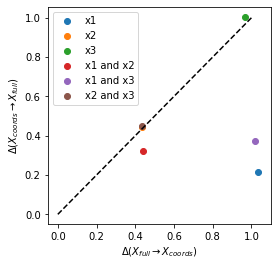

In [173]:
# plot information imbalance plane

plot_inf_imb_plane(imb_target_sel, labels)

Also here we can see that the chosen target space $x_4$ is not descriptive of certain feature spaces ($x_1$, $x_1$ and $x_3$, $x_3$), where $\Delta$ ~ 1, while it partially contains information about other subspaces ($x_2$, $x_1$ and $x_2$, $x_2$ and $x_3$). $x_1$ alone is the best descriptor of $x_4$ with $\Delta$ ~ 0.2.

### Sinusoidal function - 15D vs. 1D periodic target space

For big data sets with many possible coordinates, there is another greedy algorithm to predict all the optimal n-plets of incleasing size vs. a target space, which can be made up of different variables than the feature space which is to be tested:

In [174]:
# make 15 variables on the basis of x2

variablelist=[]
for i in range(15):
    variablelist.append(x2 + np.random.randint(-6,6, size=x2.shape))

XXX = np.hstack(variablelist)

# define a new instance of the MetricComparisons class

d3 = MetricComparisons(XXX, maxk = XXX.shape[0]-1)

In [175]:
# find optimal sets of variables up to 10-plets (n_coords=10). 
# n_best is a parameter that makes the greedy optimization better yet slower when higher.

best_sets, best_imbs, all_imbs = d3.greedy_feature_selection_target(target_ranks=targets_x4, n_coords=10, n_best=5, k=1)

total number of computations is:  15
total number of computations is:  60
total number of computations is:  63
total number of computations is:  57
total number of computations is:  51
total number of computations is:  44
total number of computations is:  40
total number of computations is:  37
total number of computations is:  31
total number of computations is:  25


In [176]:
# these are the optimum sets of each n-plet size:

print(best_sets)

[[7], [8, 6], [8, 0, 6], [8, 2, 14, 7], [0, 3, 6, 8, 14], [1, 2, 3, 6, 8, 14], [1, 2, 3, 5, 6, 8, 14], [0, 2, 3, 4, 6, 7, 8, 12], [0, 2, 3, 4, 5, 6, 7, 8, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 14]]


In [177]:
# for each optimum variable set of increasing size, these are the information imbalances 
# [full-->reduced, reduced --> full]

print(best_imbs)

[[0.75 0.69]
 [0.61 0.61]
 [0.57 0.49]
 [0.53 0.43]
 [0.51 0.41]
 [0.48 0.4 ]
 [0.45 0.4 ]
 [0.45 0.38]
 [0.42 0.39]
 [0.41 0.38]]


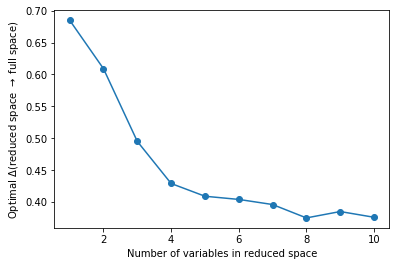

In [179]:
plt.plot(range(1,11), best_imbs[:,1], "o-")
plt.ylabel(r'Optimal $\Delta$(reduced space $\rightarrow$ full space)')
plt.xlabel("Number of variables in reduced space")
plt.show()

With an increasing number of variables in the feature space, we describe our target space $x_4$ better. There is a plateau of the imbalance around 0.4, which is due to the randomness of the variables, and where adding more variables does not improve the quality of the prediction. In such a case, we suggest to use the a tuple at the beginning of the plateau as optimal descriptive set for the target space.